# Hotel Bookings Data

Data source: www.kaggle.com/jessemostipak/hotel-booking-demand

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hotel_data = pd.read_csv('hotel_bookings.csv')

In [3]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
hotel_data['arrival_date'] = hotel_data['arrival_date_year'].astype(str) + '-' + hotel_data['arrival_date_month'].astype(str) + '-' + hotel_data['arrival_date_day_of_month'].astype(str)
hotel_data['arrival_date'] = pd.to_datetime(hotel_data['arrival_date'], format='%Y-%B-%d')

In [10]:
hotel_data['arrival_date'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

In [12]:
hotel_data['booking_date'] = hotel_data['arrival_date'] - pd.to_timedelta(hotel_data['lead_time'], unit='day')

In [14]:
hotel_data = hotel_data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1)

In [15]:
# Check basic numerical data information
hotel_data.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,13.605138,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_week_number          119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 non-null object
is_repeated_guest                 119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 n

In [18]:
# Check not avaiable values
hotel_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr             

4 missing values in children. Fill with 0.

488 missing values in country.

16340 missing values in agent.

112593 missing values in company.

In [578]:
hotel_data['children']=hotel_data['children'].fillna(0)

In [23]:
hotel_data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

### EDA

#### 1. Busy Seasons

In [63]:
# See the busiest period
month_count = hotel_data[hotel_data['is_canceled']==0].groupby(
    hotel_data['arrival_date'].dt.to_period("M")).count()['hotel']
month_count_resort = hotel_data[(hotel_data['is_canceled']==0) & (hotel_data['hotel']=='Resort Hotel')].groupby(
    hotel_data['arrival_date'].dt.to_period("M")).count()['hotel']
month_count_city = hotel_data[(hotel_data['is_canceled']==0) & (hotel_data['hotel']=='City Hotel')].groupby(
    hotel_data['arrival_date'].dt.to_period("M")).count()['hotel']


In [126]:
count_df = pd.DataFrame({'Total':month_count, 'Resort Hotel': month_count_resort, 'City Hotel':month_count_city},
                        index=month_count.index)
count_df.set_index(count_df.index.astype('datetime64'), drop=True, inplace=True)

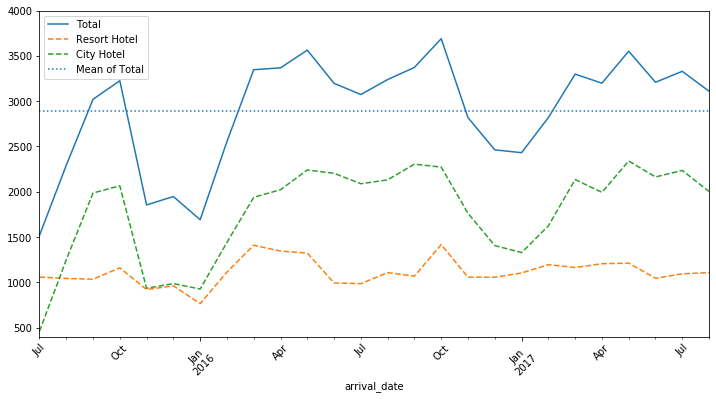

In [127]:
ax = count_df.plot(figsize=(12, 6), legend=True, rot=45, style=['-', '--', '--'])
ax.axhline(count_df['Total'].mean(), linestyle='dotted', label='Mean of Total')
ax.legend()
ax.set_ylim(400, 4000)
fig = ax.get_figure()
fig.savefig('date_count.png', dpi=200)

We checked the number of uncanceled bookings. The number of successful booking was relatively high from September to October (2015), March to October/August (2016/2017(existing data)). The peaks were in May and October. 

The trend is basically the same for Resort Hotel and City Hotel. The number varied more significantly for City Hotel, while the Resort Hotel not changed so much.

#### 2. Cancellation Rate

In [369]:
month_tcount_resort = hotel_data[(hotel_data['hotel']=='Resort Hotel')].groupby(
    hotel_data['arrival_date'].dt.to_period("M")).count()['hotel']
month_tcount_city = hotel_data[(hotel_data['hotel']=='City Hotel')].groupby(
    hotel_data['arrival_date'].dt.to_period("M")).count()['hotel']

In [370]:
resort_rate_df = pd.DataFrame({'Total': month_tcount_resort,
                               'Uncanceled': month_count_resort}, 
                               index=month_tcount_resort.index)
resort_rate_df.set_index(resort_rate_df.index.astype('datetime64'), drop=True, inplace=True)
resort_rate_df['Canceled_Rate'] = 1-resort_rate_df['Uncanceled']/resort_rate_df['Total']
city_rate_df = pd.DataFrame({'Total': month_tcount_city,
                             'Uncanceled': month_count_city}, 
                             index=month_tcount_city.index)
city_rate_df.set_index(city_rate_df.index.astype('datetime64'), drop=True, inplace=True)
city_rate_df['Canceled_Rate'] = 1- city_rate_df['Uncanceled']/city_rate_df['Total']

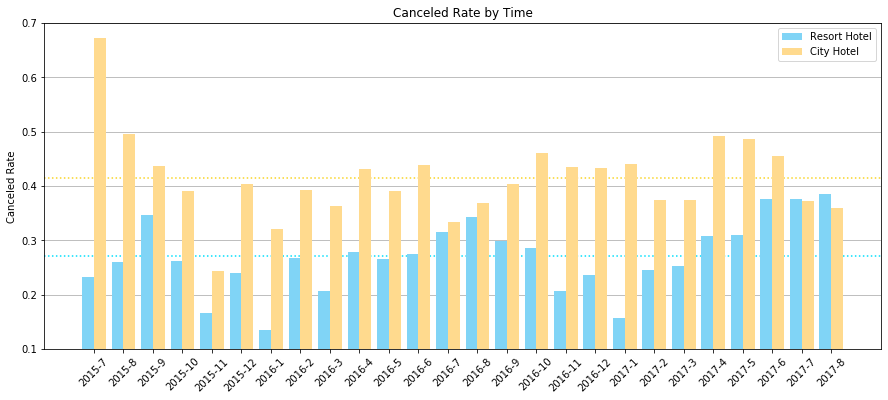

In [378]:
x = np.arange(len(list(resort_rate_df.index)))
width = 0.4
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='y', zorder=0)
ax.bar(x - width/2, resort_rate_df['Canceled_Rate'], width, label='Resort Hotel', color='#80d4f6', zorder=3)
ax.bar(x + width/2, city_rate_df['Canceled_Rate'], width, label='City Hotel', color='#ffda8e', zorder=3)
ax.axhline(resort_rate_df['Canceled_Rate'].mean(), ls='dotted', color='#00dffc')
ax.axhline(city_rate_df['Canceled_Rate'].mean(), ls='dotted', color='#f9d423')
ax.set_ylabel('Canceled Rate')
ax.set_title('Canceled Rate by Time')
ax.set_ylim((0.1, 0.7))
ax.set_xticks(x)
date_ticklabel = pd.Series(resort_rate_df.index).dt.date.map(lambda x: str(x.year)+'-'+str(x.month))
ax.set_xticklabels(date_ticklabel, rotation=45)
ax.legend()
plt.show()

Generally, the rate of canceled bookings of City Hotel is higher than Resort Hotel. 

From April to October, the rate of cacellation of Resort Hotel became higher.

Meanwhile, we can see that the cancellation rate of booking in July 2015 was extremely high (more than 65%).

#### 3. Relationship between deposit type and cancellation

In [177]:
# Check the relationship between deposit type and cancellation
# Cross Table: Method 1 -- groupby()
hotel_data.groupby(['deposit_type', 'is_canceled']).count()['hotel'].unstack()

is_canceled,0,1
deposit_type,,
No Deposit,74947,29694
Non Refund,93,14494
Refundable,126,36


In [180]:
# Cross Table: Method 2 -- crosstab
pd.crosstab(hotel_data['deposit_type'], hotel_data['is_canceled'], margins=True)

is_canceled,0,1,All
deposit_type,,,
No Deposit,74947,29694,104641
Non Refund,93,14494,14587
Refundable,126,36,162
All,75166,44224,119390


In [186]:
# Show the rate
pd.crosstab(hotel_data['deposit_type'], hotel_data['is_canceled'], normalize=0)

is_canceled,0,1
deposit_type,,
No Deposit,0.716230,0.283770
Non Refund,0.006376,0.993624
Refundable,0.777778,0.222222


Different from our intuition, the cancellation rate of non-refund booking is pretty high, even more than 99\% were cancelled. 

Due to the high volume of this kind of data (more than 12%), let's see what happened.

#### 4. Proportion of Each Deposit Type

In [281]:
hotel_cancel = hotel_data[hotel_data['is_canceled']==1]
hotel_uncancel = hotel_data[hotel_data['is_canceled']==0]

In [366]:
crt_3 = pd.crosstab([hotel_cancel['hotel']],
                    hotel_cancel['deposit_type'], normalize=False, margins=True)
crt_3

deposit_type,No Deposit,Non Refund,Refundable,All
hotel,,,,
City Hotel,20244,12844,14,33102
Resort Hotel,9450,1650,22,11122
All,29694,14494,36,44224


In [367]:
crt_5 = pd.crosstab([hotel_data['hotel']],
                    hotel_data['deposit_type'], normalize=False, margins=True)
crt_5

deposit_type,No Deposit,Non Refund,Refundable,All
hotel,,,,
City Hotel,66442,12868,20,79330
Resort Hotel,38199,1719,142,40060
All,104641,14587,162,119390


In [368]:
crt_3/crt_5

deposit_type,No Deposit,Non Refund,Refundable,All
hotel,,,,
City Hotel,0.30,1.00,0.70,0.42
Resort Hotel,0.25,0.96,0.15,0.28
All,0.28,0.99,0.22,0.37


#### 5. Comparing Lead Time between Non Refund and Other Bookings (Canceled)

In [392]:
norefund_df = hotel_data[(hotel_data['deposit_type']=='Non Refund') & (hotel_data['is_canceled']==1)]
other_df = hotel_data[((hotel_data['deposit_type']!='Non Refund') & (hotel_data['is_canceled']==1))]

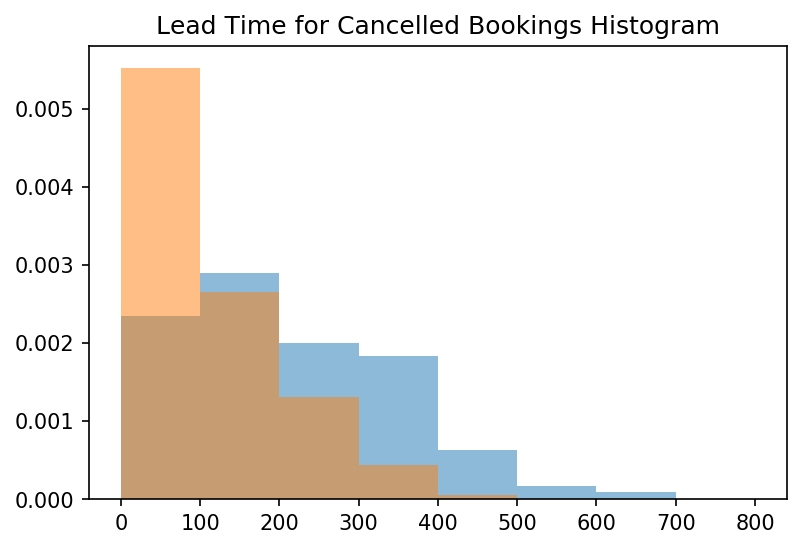

In [394]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1)
ax.hist(norefund_df['lead_time'], density=True, alpha=0.5, bins=8, range=(0, 800), label='Non-refund & Cancelled')
ax.hist(other_df['lead_time'], density=True, alpha=0.5, bins=8, range=(0, 800), label='Others')
ax.set_title('Lead Time for Cancelled Bookings Histogram')
plt.show()

Comparing with other type of deposit types, the cancelled non-refund bookings have longer lead time, which means the probability of changing plan is high.

#### 6. Deposit Type and Market Segment

In [325]:
crt_1 = pd.crosstab([hotel_data['market_segment'], hotel_data['is_canceled']],
                    hotel_data['deposit_type'], normalize=False)

In [326]:
crt_2 = pd.crosstab([hotel_data['market_segment'], hotel_data['is_canceled']],
                    hotel_data['deposit_type'], normalize=1)

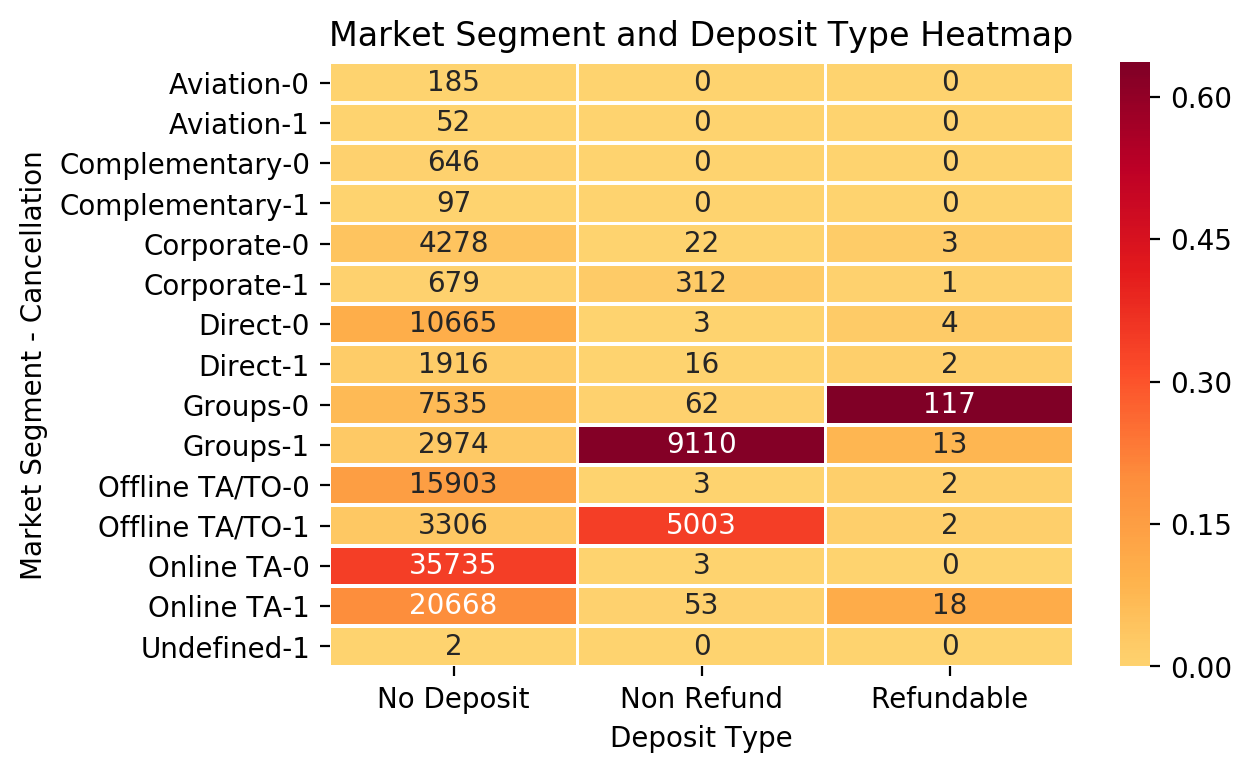

In [350]:
fig = plt.figure(dpi=200)
ax = sns.heatmap(crt_2, cmap='YlOrRd', annot=crt_1, center=0.2, robust=True, linewidths=1, fmt='.20g')
ax.set_title('Market Segment and Deposit Type Heatmap')
ax.set_xlabel('Deposit Type')
ax.set_ylabel('Market Segment - Cancellation')
fig.savefig('heatmap.png')

Most of non-refund bookings came from group or offline TA/TO. 

#### 7. Agent/Company IDs for Different Market Segments

In [434]:
crt_agent = pd.crosstab(pd.isnull(hotel_data['agent']), hotel_data['market_segment'], normalize=1)
crt_company = pd.crosstab(pd.isnull(hotel_data['company']), hotel_data['market_segment'], normalize=1)

In [435]:
crt_company

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
company,,,,,,,,
False,0.89,0.42,0.84,0.02,0.07,0.00,0.00,0.00
True,0.11,0.58,0.16,0.98,0.93,1.00,1.00,1.00


In [436]:
crt_agent

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
agent,,,,,,,,
False,0.11,0.14,0.13,0.52,0.79,0.98,0.99,0.00
True,0.89,0.86,0.87,0.48,0.21,0.02,0.01,1.00


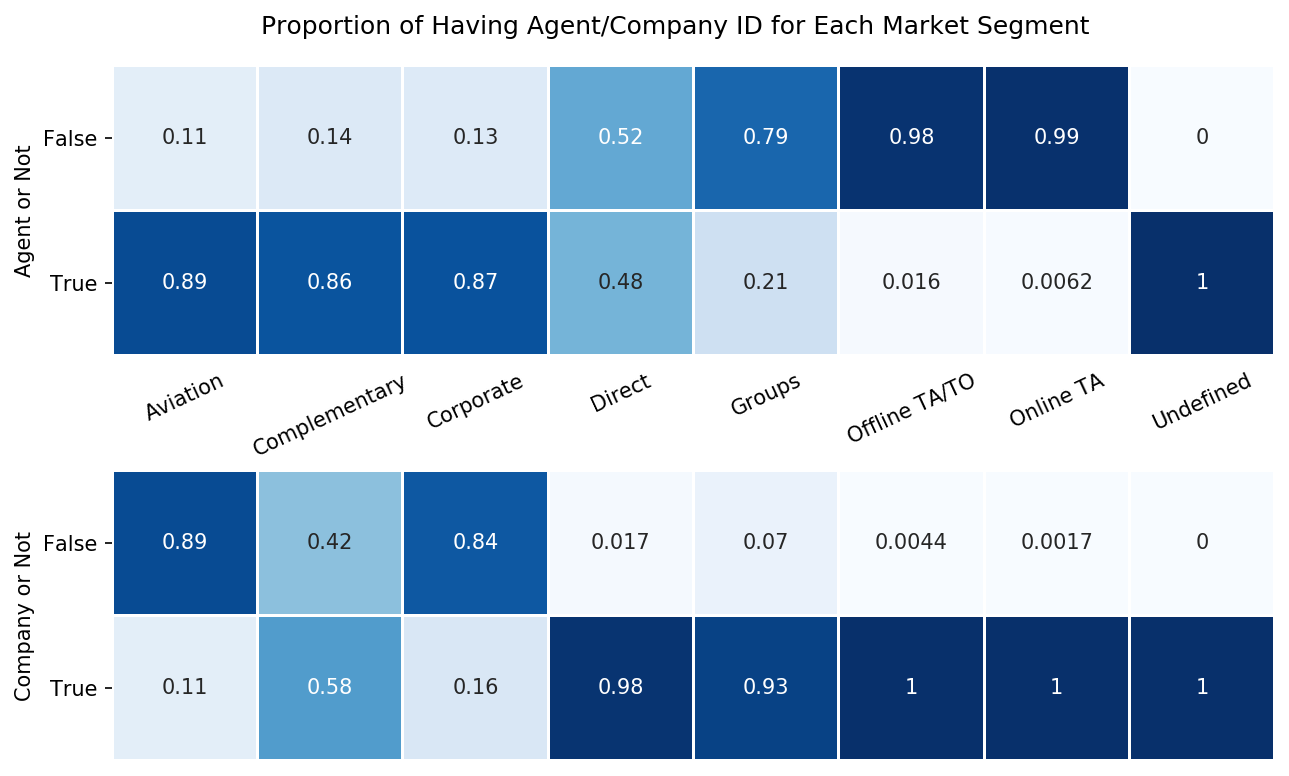

In [510]:
fig, axes = plt.subplots(nrows=2, dpi=150, figsize=(10, 6))
# plt.subplots_adjust(wspace =0, hspace =0)
sns.heatmap(crt_agent, cmap='Blues', annot=crt_agent, robust=True, linewidths=1, ax=axes[0], square=True, cbar=False)
axes[0].tick_params(axis='x', rotation=25, which='major',width=0)
axes[0].tick_params(axis='y', rotation=0)
axes[0].set_ylabel('Agent or Not')
axes[0].set_xlabel('')
sns.heatmap(crt_company, cmap='Blues', annot=crt_company, robust=True, linewidths=1, ax=axes[1], square=True, cbar=False)
# axes[1].tick_params(axis='x', rotation=25)
axes[1].tick_params(axis='y', rotation=0)
axes[1].set_ylabel('Company or Not')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
fig.suptitle('Proportion of Having Agent/Company ID for Each Market Segment')
fig.subplots_adjust(top=0.95)
fig.savefig('comp_agent_heatmap.png')

It is not hard to find that most bookings with agent IDs came from Aviation, Comlementary and Corporate and most bokkings with company IDs came from Direct, Groups and TA/TO. 

Company and agent ID information are largely overlapping with market segment. Maybe we could leave them out when using some prediction methods to avoid overfitting.

#### 8. Analysis for other numerical columns

In [671]:
crt_cols = ['total_of_special_requests', 'required_car_parking_spaces', 'days_in_waiting_list',
            'booking_changes', 'previous_cancellations', 'previous_bookings_not_canceled',
            'is_repeated_guest', 'children', 'babies']
for col in crt_cols:
    crt1 = pd.crosstab(hotel_data['is_canceled'], hotel_data[col]!=0)
    print(crt1)
    crt2 = pd.crosstab(hotel_data['is_canceled'], hotel_data[col]!=0, normalize=1)
    print(crt2)
    print('-------------------------------', '\n')

total_of_special_requests  False  True 
is_canceled                            
0                          36762  38404
1                          33556  10668
total_of_special_requests  False  True 
is_canceled                            
0                           0.52   0.78
1                           0.48   0.22
------------------------------- 

required_car_parking_spaces  False  True 
is_canceled                              
0                            67750   7416
1                            44224      0
required_car_parking_spaces  False  True 
is_canceled                              
0                             0.61   1.00
1                             0.39   0.00
------------------------------- 

days_in_waiting_list  False  True 
is_canceled                       
0                     73827   1339
1                     41865   2359
days_in_waiting_list  False  True 
is_canceled                       
0                      0.64   0.36
1                      0.36   0

From the crosstables above, we can find that customers with the following features are more likely to keep their bookings.
1. Having sepecial requests or requiring parking sapces 
2. Having one or more babies
3. Having made changes/amendments to the booking
4. Having been to this hotel
5. Not in waiting list
6. Never cancaled a booking before
7. Having booked a hotel before

1-4 features could be concluded as the customers satisfied with the hotel, because the hotel met their needs (special requests, parking need, feeding babies need, etc.).

Customers would like to make sure their trip so that waiting list is not wanted.

6-7 may be attributed to personal behaviors. 

#### 9. Price Per Night Per Person

In [762]:
hotel_data['price'] = hotel_data['adr']/(hotel_data['adults']+hotel_data['children'])
resort_price = hotel_data.loc[hotel_data['hotel']=='Resort Hotel', 'price']
city_price = hotel_data.loc[hotel_data['hotel']=='City Hotel', 'price']
price_median_resort = np.median(resort_price[np.isfinite(resort_price)])
price_median_city = np.median(city_price[np.isfinite(city_price)])

In [763]:
hotel_data.loc[hotel_data['hotel']=='Resort Hotel','price'] = hotel_data.loc[hotel_data['hotel']=='Resort Hotel','price'].replace([np.nan, np.inf],
                                                                                                                                  price_median_resort)

In [764]:
hotel_data.loc[hotel_data['hotel']=='City Hotel','price'] = hotel_data.loc[hotel_data['hotel']=='City Hotel','price'].replace([np.nan, np.inf],
                                                                                                                              price_median_city)

In [819]:
month_pmean_resort = hotel_data[(hotel_data['hotel']=='Resort Hotel')].groupby(
    hotel_data['arrival_date'].dt.to_period("M")).mean()['price']
month_pmean_city = hotel_data[(hotel_data['hotel']=='City Hotel')].groupby(
    hotel_data['arrival_date'].dt.to_period("M")).mean()['price']
month_pmean_resort.index = month_pmean_resort.index.to_timestamp()
month_pmean_city.index = month_pmean_city.index.to_timestamp()

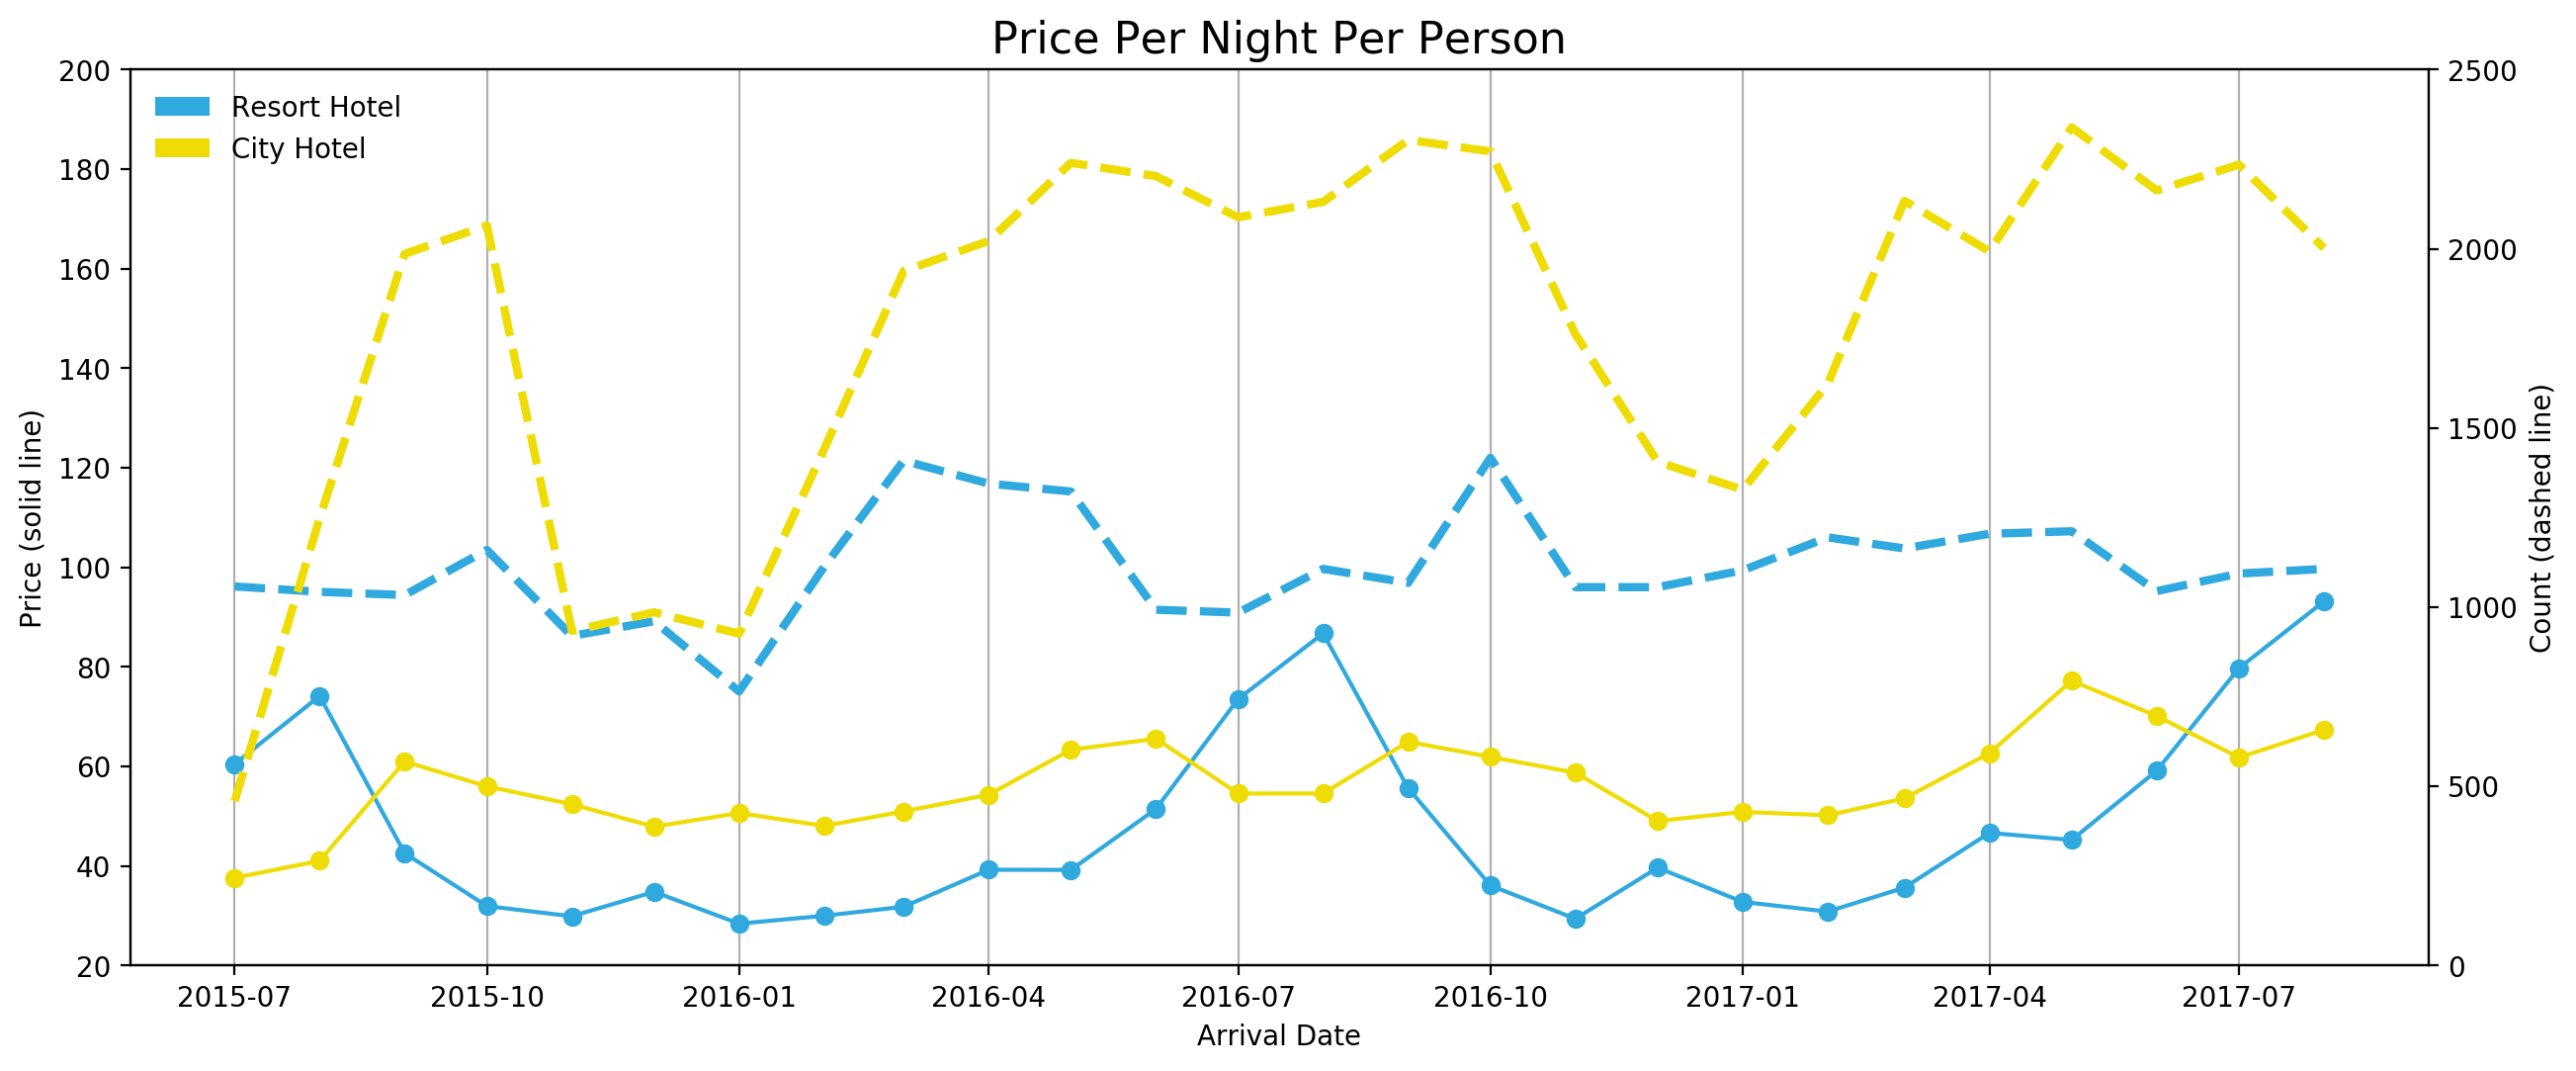

In [841]:
x = np.arange(len(list(month_pmean_resort.index)))
fig = plt.figure(figsize=(15, 6), dpi=200)
ax = fig.add_subplot(1, 1, 1)
ax.plot(month_pmean_resort, label='Resort Hotel', color='#30A9DE', marker='o')
ax.plot(month_pmean_city, label='City Hotel', color='#EFDC05', marker='o')
ax2 = ax.twinx()
ax2.plot(count_df[['Resort Hotel']], color='#30A9DE', ls='--', linewidth=3)
ax2.plot(count_df[['City Hotel']], color='#EFDC05', ls='--', linewidth=3)
ax.set_ylim((20, 200))
ax2.set_ylim((0, 2500))
ax.grid(axis='x', zorder=0)
ax.set_xlabel('Arrival Date')
ax.set_ylabel('Price (solid line)')
ax2.set_ylabel('Count (dashed line)')
ax.set_title('Price Per Night Per Person', fontsize=16)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#30A9DE', 
                         label='Resort Hotel'),
                   Patch(facecolor='#EFDC05', 
                         label='City Hotel')]
ax.legend(handles=legend_elements, frameon=False, loc='upper left')
plt.show()

The price of the Resort Hotel fluctuated more heavily than the City Hotel. The price of the Resort Hotel was higher in summer, especially in July and August. The price of the City Hotel was much more stable, lower than the Resort Hotel in July and August and higher in other months.

Combining the number of uncancelled bookings, the trend of price and booking number for the City Hotel is generally synchronous. For the Resort Hotel, the booking number is lower from June to September maybe due to the relatively high price. This is only my own speculation based on the existing data. Maybe we need more data in other year to proof that.

#### 10. Country Information

In [1037]:
len(hotel_data['country'].unique())

178

In [869]:
sort = (hotel_data.groupby(['country'])['hotel'].count()/len(hotel_data['hotel'])).sort_values(ascending=False)
sort[:10]

country
PRT   0.41
GBR   0.10
FRA   0.09
ESP   0.07
DEU   0.06
ITA   0.03
IRL   0.03
BEL   0.02
BRA   0.02
NLD   0.02
Name: hotel, dtype: float64

Customers from 178 countries booked these two hotels, while more than 40% was from Portugal. 

The top 5 countries are Portugal, United Kingdom, France, Spain, Germany. Therefore I guess the data comes from two hotels in Portugal.

In [870]:
pd.crosstab(hotel_data['is_canceled'], hotel_data['country']=='PRT')

country,False,True
is_canceled,,
0,54095,21071
1,16705,27519


In [872]:
pd.crosstab(hotel_data['is_canceled'], hotel_data['country']=='PRT', normalize=1)

country,False,True
is_canceled,,
0,0.76,0.43
1,0.24,0.57


From the crosstable, we find that bookings from Portugal were more possible to be canceled. 

If the hotels are really in Portugal, maybe we can explain that as travel plans accross coutries are settled more carefully and less likely to be changed

### Feature Transformation

In [842]:
from sklearn import preprocessing

#### 1. Construct Binary Features

In [913]:
hotel_data['agent_fill'] = hotel_data['agent'].fillna(0)
hotel_data['company_fill'] = hotel_data['agent'].fillna(0)

In [916]:
hotel_data['agent_fill'].isna().sum()

0

In [914]:
# change to binary data
bi_cols = ['total_of_special_requests', 'required_car_parking_spaces', 'days_in_waiting_list',
            'booking_changes', 'previous_cancellations', 'previous_bookings_not_canceled',
            'is_repeated_guest', 'babies', 'children', 'agent_fill', 'company_fill']
for col in bi_cols:
    hotel_data[col+'_bi'] = hotel_data[col].astype(bool).astype(int)

#### 2. Transform Catgorical Features

In [847]:
label_encoder = preprocessing.LabelEncoder() 

In [848]:
cat_col = ['meal', 'market_segment', 'deposit_type', 'customer_type', 'hotel']
for col in cat_col:
    hotel_data[col+'_cat'] = label_encoder.fit_transform(hotel_data[col])

In [856]:
hotel_data['arrival_month'] = hotel_data['arrival_date'].map(lambda x: x.month)

In [886]:
hotel_data['country_bi'] = hotel_data['country'].map(lambda x: 1 if x=='PRT' else 0)

In [915]:
correlation=hotel_data.corr()['is_canceled']
correlation.abs().sort_values(ascending=False)

is_canceled                         1.00
deposit_type_cat                    0.47
country_bi                          0.34
lead_time                           0.29
previous_cancellations_bi           0.27
total_of_special_requests_bi        0.26
total_of_special_requests           0.23
required_car_parking_spaces_bi      0.20
required_car_parking_spaces         0.20
booking_changes_bi                  0.19
booking_changes                     0.14
hotel_cat                           0.14
previous_bookings_not_canceled_bi   0.12
previous_cancellations              0.11
agent_fill_bi                       0.10
company_fill_bi                     0.10
days_in_waiting_list_bi             0.10
is_repeated_guest_bi                0.08
is_repeated_guest                   0.08
agent                               0.08
customer_type_cat                   0.07
adults                              0.06
market_segment_cat                  0.06
previous_bookings_not_canceled      0.06
days_in_waiting_

I choose features with correlation above `meal_cat` to build a model and use binary features for those we transformed.

From the previous analysis, we also see that the cancel rate varied by arrival date. So we also include arrival month.

The type of room is not specified so that we leave them out.

Country has so many 

In [917]:
X_full = hotel_data[['hotel_cat', 'lead_time', 'adults', 'babies_bi', 'country_bi', 'market_segment_cat', 
                    'is_repeated_guest_bi', 'previous_cancellations_bi', 'previous_bookings_not_canceled_bi',
                    'booking_changes_bi', 'deposit_type_cat', 'days_in_waiting_list_bi', 
                    'customer_type_cat', 'adr', 'required_car_parking_spaces_bi', 'total_of_special_requests_bi',
                    'meal_cat', 'arrival_month', 'agent_fill_bi', 'company_fill_bi'
                    ]]
y_full = hotel_data['is_canceled']

## Classifier for is_canceled

In [927]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [946]:
X_t, X_test, y_t, y_test = train_test_split(X_full, y_full, 
                                             train_size=0.75, test_size=0.25,
                                             random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, 
                                                      train_size=0.75, test_size=0.25,
                                                      random_state=0)

Build Decision Tree, Random Forest and Extra Trees classifiers.

In [1036]:
clf = DecisionTreeClassifier(min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X_train, y_train)
print('Accuracy of Decision Tree: ',scores.mean())

clf = RandomForestClassifier(min_samples_split=2, random_state=0)
# clf = clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train)
print('Accuracy of Random Forest: ',scores.mean())

clf = ExtraTreesClassifier(min_samples_split=2, random_state=0)
clf = clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train)
print('Accuracy of Extra Trees',scores.mean())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy of Decision Tree:  0.8236791640339313


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 i

Accuracy of Random Forest:  0.8532520953806985


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy of Extra Trees 0.8490678162518517


#### Tuning Parameters for RandomForest

Random Forest gets highest score. Then we tune parameters to make a better model.

In [947]:
from sklearn.model_selection import GridSearchCV

In [984]:
rf0 = RandomForestClassifier(oob_score=True, random_state=0)
rf0.fit(X_t,y_t)
print('OOB Score:', rf0.oob_score_)
y_test_pred = rf0.predict(X_test)
print('AUC Score (Test):', roc_auc_score(y_test, y_test_pred), '\n',
      'Accuracy (Test):', accuracy_score(y_test, y_test_pred))
y_t_pred = rf0.predict(X_t)
print('AUC Score (Train):', roc_auc_score(y_t, y_t_pred), '\n',
      'Accuracy (Train):', accuracy_score(y_t, y_t_pred))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


OOB Score: 0.8491545866744098
AUC Score (Valid): 0.8425379020585815 
 Accuracy (Valid): 0.8601246314660949
AUC Score (Train): 0.9767264397501966 
 Accuracy (Train): 0.9805454423622434


In [1004]:
param_test1 = {'n_estimators':range(50,500,50)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                                           min_samples_leaf=20,
                                                           max_depth=8,
                                                           max_features='sqrt', 
                                                           random_state=0),
                        param_grid = param_test1, scoring=['roc_auc', 'accuracy'], 
                        cv=4, refit='roc_auc', verbose=4)

In [1005]:
gsearch1.fit(X_t, y_t)
print(gsearch1.best_params_, gsearch1.best_score_)
pd.DataFrame(gsearch1.cv_results_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... n_estimators=50, accuracy=0.834, roc_auc=0.911, total=   1.4s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ... n_estimators=50, accuracy=0.822, roc_auc=0.906, total=   1.4s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV] ... n_estimators=50, accuracy=0.827, roc_auc=0.912, total=   1.3s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s


[CV] ... n_estimators=50, accuracy=0.831, roc_auc=0.908, total=   1.4s
[CV] n_estimators=100 ................................................
[CV] .. n_estimators=100, accuracy=0.833, roc_auc=0.911, total=   2.6s
[CV] n_estimators=100 ................................................
[CV] .. n_estimators=100, accuracy=0.829, roc_auc=0.907, total=   2.7s
[CV] n_estimators=100 ................................................
[CV] .. n_estimators=100, accuracy=0.827, roc_auc=0.912, total=   2.6s
[CV] n_estimators=100 ................................................
[CV] .. n_estimators=100, accuracy=0.829, roc_auc=0.909, total=   2.6s
[CV] n_estimators=150 ................................................
[CV] .. n_estimators=150, accuracy=0.833, roc_auc=0.911, total=   3.9s
[CV] n_estimators=150 ................................................
[CV] .. n_estimators=150, accuracy=0.830, roc_auc=0.907, total=   3.9s
[CV] n_estimators=150 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  3.9min finished


{'n_estimators': 350} 0.9103326539482078


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,1.19,0.03,0.16,0.01,50,{'n_estimators': 50},0.91,0.91,0.91,0.91,0.91,0.00,9,0.83,0.82,0.83,0.83,0.83,0.00,9
1,2.34,0.01,0.29,0.00,100,{'n_estimators': 100},0.91,0.91,0.91,0.91,0.91,0.00,7,0.83,0.83,0.83,0.83,0.83,0.00,8
2,3.41,0.09,0.41,0.01,150,{'n_estimators': 150},0.91,0.91,0.91,0.91,0.91,0.00,8,0.83,0.83,0.83,0.83,0.83,0.00,7
3,4.53,0.10,0.55,0.03,200,{'n_estimators': 200},0.91,0.91,0.91,0.91,0.91,0.00,6,0.83,0.83,0.83,0.83,0.83,0.00,5
4,5.78,0.12,0.72,0.03,250,{'n_estimators': 250},0.91,0.91,0.91,0.91,0.91,0.00,5,0.83,0.83,0.83,0.83,0.83,0.00,4
5,6.93,0.07,0.84,0.02,300,{'n_estimators': 300},0.91,0.91,0.91,0.91,0.91,0.00,4,0.83,0.83,0.83,0.83,0.83,0.00,1
6,8.12,0.04,1.00,0.01,350,{'n_estimators': 350},0.91,0.91,0.91,0.91,0.91,0.00,1,0.83,0.83,0.83,0.83,0.83,0.00,2
7,9.32,0.10,1.16,0.07,400,{'n_estimators': 400},0.91,0.91,0.91,0.91,0.91,0.00,2,0.83,0.83,0.83,0.83,0.83,0.00,3
8,10.27,0.11,1.26,0.07,450,{'n_estimators': 450},0.91,0.91,0.91,0.91,0.91,0.00,3,0.83,0.83,0.83,0.83,0.83,0.00,5


In [1008]:
param_test2 = {'max_depth':range(5, 31, 5), 'min_samples_split': [2, 5, 10]}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 350, 
                                                           min_samples_leaf=20, 
                                                           max_features='sqrt',
                                                           random_state=10),
                        param_grid = param_test2, scoring=['roc_auc', 'accuracy'], 
                        cv=4, refit='roc_auc', verbose=4)

In [1009]:
gsearch2.fit(X_t, y_t)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[CV] max_depth=5, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_split=2, accuracy=0.782, roc_auc=0.898, total=   6.9s
[CV] max_depth=5, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV]  max_depth=5, min_samples_split=2, accuracy=0.780, roc_auc=0.893, total=   6.9s
[CV] max_depth=5, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.8s remaining:    0.0s


[CV]  max_depth=5, min_samples_split=2, accuracy=0.782, roc_auc=0.900, total=   6.6s
[CV] max_depth=5, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.4s remaining:    0.0s


[CV]  max_depth=5, min_samples_split=2, accuracy=0.784, roc_auc=0.897, total=   6.6s
[CV] max_depth=5, min_samples_split=5 ................................
[CV]  max_depth=5, min_samples_split=5, accuracy=0.782, roc_auc=0.898, total=   6.6s
[CV] max_depth=5, min_samples_split=5 ................................
[CV]  max_depth=5, min_samples_split=5, accuracy=0.780, roc_auc=0.893, total=   6.7s
[CV] max_depth=5, min_samples_split=5 ................................
[CV]  max_depth=5, min_samples_split=5, accuracy=0.782, roc_auc=0.900, total=   6.7s
[CV] max_depth=5, min_samples_split=5 ................................
[CV]  max_depth=5, min_samples_split=5, accuracy=0.784, roc_auc=0.897, total=   6.6s
[CV] max_depth=5, min_samples_split=10 ...............................
[CV]  max_depth=5, min_samples_split=10, accuracy=0.782, roc_auc=0.898, total=   6.6s
[CV] max_depth=5, min_samples_split=10 ...............................
[CV]  max_depth=5, min_samples_split=10, accuracy=0.780, roc_au

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 12.7min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=20,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=350, n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'ma

In [1010]:
print(gsearch2.best_params_, gsearch2.best_score_)
pd.DataFrame(gsearch2.cv_results_)

{'max_depth': 30, 'min_samples_split': 2} 0.9264321346594334


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,...,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,6.01,0.15,0.74,0.01,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.90,0.89,0.90,...,0.90,0.00,16,0.78,0.78,0.78,0.78,0.78,0.00,16
1,5.90,0.04,0.72,0.01,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.90,0.89,0.90,...,0.90,0.00,16,0.78,0.78,0.78,0.78,0.78,0.00,16
2,5.87,0.02,0.73,0.01,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.90,0.89,0.90,...,0.90,0.00,16,0.78,0.78,0.78,0.78,0.78,0.00,16
3,8.75,0.06,1.07,0.01,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.92,0.91,0.92,...,0.92,0.00,13,0.84,0.84,0.84,0.84,0.84,0.00,13
4,8.81,0.07,1.06,0.00,10,5,"{'max_depth': 10, 'min_samples_split': 5}",0.92,0.91,0.92,...,0.92,0.00,13,0.84,0.84,0.84,0.84,0.84,0.00,13
5,8.75,0.05,1.10,0.06,10,10,"{'max_depth': 10, 'min_samples_split': 10}",0.92,0.91,0.92,...,0.92,0.00,13,0.84,0.84,0.84,0.84,0.84,0.00,13
6,10.09,0.06,1.30,0.03,15,2,"{'max_depth': 15, 'min_samples_split': 2}",0.93,0.92,0.93,...,0.92,0.00,10,0.85,0.84,0.85,0.85,0.85,0.00,10
7,10.24,0.21,1.34,0.07,15,5,"{'max_depth': 15, 'min_samples_split': 5}",0.93,0.92,0.93,...,0.92,0.00,10,0.85,0.84,0.85,0.85,0.85,0.00,10
8,10.13,0.07,1.30,0.01,15,10,"{'max_depth': 15, 'min_samples_split': 10}",0.93,0.92,0.93,...,0.92,0.00,10,0.85,0.84,0.85,0.85,0.85,0.00,10
9,10.79,0.76,1.35,0.02,20,2,"{'max_depth': 20, 'min_samples_split': 2}",0.93,0.92,0.93,...,0.93,0.00,7,0.85,0.85,0.85,0.85,0.85,0.00,7


In [1034]:
rf1 = RandomForestClassifier(n_estimators= 320, oob_score=True, random_state=0, min_samples_split=2, max_depth=30)
rf1.fit(X_t,y_t)
print('OOB Score:', rf1.oob_score_)
y_test_pred = rf1.predict(X_test)
print('AUC Score (Test):', roc_auc_score(y_test, y_test_pred), '\n',
      'Accuracy (Test):', accuracy_score(y_test, y_test_pred))
y_t_pred = rf1.predict(X_t)
print('AUC Score (Train):', roc_auc_score(y_t, y_t_pred), '\n',
      'Accuracy (Train):', accuracy_score(y_t, y_t_pred))

OOB Score: 0.8712336110428626
AUC Score (Test): 0.8557701451156388 
 Accuracy (Test): 0.870242562315733
AUC Score (Train): 0.9747990679119122 
 Accuracy (Train): 0.9785017086953608


In [1015]:
param_test3 = {'min_samples_leaf':range(5, 36, 10), 'min_samples_split': [2, 5, 10]}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=350, 
                                                           max_depth=30,
                                                           max_features='sqrt',
                                                           random_state=10),
                        param_grid = param_test3, scoring=['roc_auc', 'accuracy'], 
                        cv=4, refit='roc_auc', verbose=4)

In [1016]:
gsearch3.fit(X_t,y_t)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] min_samples_leaf=5, min_samples_split=2 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=5, min_samples_split=2, accuracy=0.861, roc_auc=0.937, total=  13.9s
[CV] min_samples_leaf=5, min_samples_split=2 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.9s remaining:    0.0s


[CV]  min_samples_leaf=5, min_samples_split=2, accuracy=0.856, roc_auc=0.934, total=  13.7s
[CV] min_samples_leaf=5, min_samples_split=2 .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.6s remaining:    0.0s


[CV]  min_samples_leaf=5, min_samples_split=2, accuracy=0.862, roc_auc=0.938, total=  13.7s
[CV] min_samples_leaf=5, min_samples_split=2 .........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.3s remaining:    0.0s


[CV]  min_samples_leaf=5, min_samples_split=2, accuracy=0.860, roc_auc=0.936, total=  13.6s
[CV] min_samples_leaf=5, min_samples_split=5 .........................
[CV]  min_samples_leaf=5, min_samples_split=5, accuracy=0.861, roc_auc=0.937, total=  13.6s
[CV] min_samples_leaf=5, min_samples_split=5 .........................
[CV]  min_samples_leaf=5, min_samples_split=5, accuracy=0.856, roc_auc=0.934, total=  14.0s
[CV] min_samples_leaf=5, min_samples_split=5 .........................
[CV]  min_samples_leaf=5, min_samples_split=5, accuracy=0.862, roc_auc=0.938, total=  13.7s
[CV] min_samples_leaf=5, min_samples_split=5 .........................
[CV]  min_samples_leaf=5, min_samples_split=5, accuracy=0.860, roc_auc=0.936, total=  13.8s
[CV] min_samples_leaf=5, min_samples_split=10 ........................
[CV]  min_samples_leaf=5, min_samples_split=10, accuracy=0.861, roc_auc=0.937, total=  14.3s
[CV] min_samples_leaf=5, min_samples_split=10 ........................
[CV]  min_samples_lea

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  9.8min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=30,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=350, n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_s

In [1017]:
print(gsearch3.best_params_, gsearch3.best_score_)
pd.DataFrame(gsearch3.cv_results_)

{'min_samples_leaf': 5, 'min_samples_split': 2} 0.9363353172765347


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,...,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,12.05,0.09,1.69,0.03,5,2,"{'min_samples_leaf': 5, 'min_samples_split': 2}",0.94,0.93,0.94,...,0.94,0.00,1,0.86,0.86,0.86,0.86,0.86,0.00,1
1,12.05,0.08,1.74,0.08,5,5,"{'min_samples_leaf': 5, 'min_samples_split': 5}",0.94,0.93,0.94,...,0.94,0.00,1,0.86,0.86,0.86,0.86,0.86,0.00,1
2,12.49,0.12,1.74,0.05,5,10,"{'min_samples_leaf': 5, 'min_samples_split': 10}",0.94,0.93,0.94,...,0.94,0.00,1,0.86,0.86,0.86,0.86,0.86,0.00,1
3,11.05,0.11,1.48,0.03,15,2,"{'min_samples_leaf': 15, 'min_samples_split': 2}",0.93,0.93,0.93,...,0.93,0.00,4,0.85,0.85,0.85,0.85,0.85,0.00,4
4,10.67,0.07,1.41,0.01,15,5,"{'min_samples_leaf': 15, 'min_samples_split': 5}",0.93,0.93,0.93,...,0.93,0.00,4,0.85,0.85,0.85,0.85,0.85,0.00,4
5,10.65,0.02,1.42,0.02,15,10,"{'min_samples_leaf': 15, 'min_samples_split': 10}",0.93,0.93,0.93,...,0.93,0.00,4,0.85,0.85,0.85,0.85,0.85,0.00,4
6,10.26,0.07,1.35,0.05,25,2,"{'min_samples_leaf': 25, 'min_samples_split': 2}",0.93,0.92,0.93,...,0.92,0.00,7,0.85,0.85,0.85,0.85,0.85,0.00,7
7,10.23,0.14,1.35,0.05,25,5,"{'min_samples_leaf': 25, 'min_samples_split': 5}",0.93,0.92,0.93,...,0.92,0.00,7,0.85,0.85,0.85,0.85,0.85,0.00,7
8,10.31,0.07,1.36,0.03,25,10,"{'min_samples_leaf': 25, 'min_samples_split': 10}",0.93,0.92,0.93,...,0.92,0.00,7,0.85,0.85,0.85,0.85,0.85,0.00,7
9,9.94,0.09,1.26,0.01,35,2,"{'min_samples_leaf': 35, 'min_samples_split': 2}",0.92,0.92,0.92,...,0.92,0.00,10,0.85,0.84,0.85,0.85,0.85,0.00,10


In [1026]:
param_test4 = {'max_features':[1, 2, 5, 10, 15]}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=350, 
                                                           max_depth=30,
                                                           max_features='sqrt',
                                                           min_samples_split=2,
                                                           random_state=10),
                        param_grid = param_test4, scoring=['roc_auc', 'accuracy'], 
                        cv=4, refit='roc_auc', verbose=4)

In [1027]:
gsearch4.fit(X_t,y_t)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV] max_features=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_features=1, accuracy=0.867, roc_auc=0.940, total=  14.5s
[CV] max_features=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.5s remaining:    0.0s


[CV] .... max_features=1, accuracy=0.865, roc_auc=0.939, total=  14.5s
[CV] max_features=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.1s remaining:    0.0s


[CV] .... max_features=1, accuracy=0.870, roc_auc=0.942, total=  14.3s
[CV] max_features=1 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.5s remaining:    0.0s


[CV] .... max_features=1, accuracy=0.865, roc_auc=0.940, total=  14.3s
[CV] max_features=2 ..................................................
[CV] .... max_features=2, accuracy=0.868, roc_auc=0.941, total=  15.4s
[CV] max_features=2 ..................................................
[CV] .... max_features=2, accuracy=0.866, roc_auc=0.939, total=  15.5s
[CV] max_features=2 ..................................................
[CV] .... max_features=2, accuracy=0.871, roc_auc=0.943, total=  15.4s
[CV] max_features=2 ..................................................
[CV] .... max_features=2, accuracy=0.867, roc_auc=0.940, total=  15.4s
[CV] max_features=5 ..................................................
[CV] .... max_features=5, accuracy=0.867, roc_auc=0.941, total=  20.2s
[CV] max_features=5 ..................................................
[CV] .... max_features=5, accuracy=0.866, roc_auc=0.940, total=  20.2s
[CV] max_features=5 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.9min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=30,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=350, n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_f

In [1028]:
print(gsearch4.best_params_, gsearch4.best_score_)
pd.DataFrame(gsearch4.cv_results_)

{'max_features': 5} 0.9411278091667006


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,11.62,0.08,2.78,0.05,1,{'max_features': 1},0.94,0.94,0.94,0.94,0.94,0.00,4,0.87,0.87,0.87,0.86,0.87,0.00,3
1,12.70,0.09,2.73,0.05,2,{'max_features': 2},0.94,0.94,0.94,0.94,0.94,0.00,2,0.87,0.87,0.87,0.87,0.87,0.00,1
2,17.37,0.09,2.76,0.07,5,{'max_features': 5},0.94,0.94,0.94,0.94,0.94,0.00,1,0.87,0.87,0.87,0.87,0.87,0.00,2
3,26.44,0.44,2.59,0.10,10,{'max_features': 10},0.94,0.94,0.94,0.94,0.94,0.00,3,0.87,0.87,0.87,0.86,0.87,0.00,4
4,36.14,0.30,2.56,0.18,15,{'max_features': 15},0.94,0.94,0.94,0.94,0.94,0.00,5,0.86,0.86,0.87,0.86,0.87,0.00,5


In [1029]:
rf2 = RandomForestClassifier(n_estimators= 320, oob_score=True, random_state=0, 
                             min_samples_split=2, max_depth=30, min_samples_leaf=5,
                             max_features=5)
rf2.fit(X_t,y_t)
print('OOB Score:', rf2.oob_score_)
y_test_pred = rf2.predict(X_test)
print('AUC Score (Test):', roc_auc_score(y_test, y_test_pred), '\n',
      'Accuracy (Test):', accuracy_score(y_test, y_test_pred))
y_t_pred = rf2.predict(X_t)
print('AUC Score (Train):', roc_auc_score(y_t, y_t_pred), '\n',
      'Accuracy (Train):', accuracy_score(y_t, y_t_pred))

OOB Score: 0.8634383864555181
AUC Score (Test): 0.8409450914751606 
 Accuracy (Test): 0.8621013133208255
AUC Score (Train): 0.8635517638174695 
 Accuracy (Train): 0.8838422192937393


After tuning parameters, we find that model `rf1` has the best performance on train and test set.

In [1035]:
print('OOB Score:', rf1.oob_score_)
y_test_pred = rf1.predict(X_test)
print('AUC Score (Test):', roc_auc_score(y_test, y_test_pred), '\n',
      'Accuracy (Test):', accuracy_score(y_test, y_test_pred))
y_t_pred = rf1.predict(X_t)
print('AUC Score (Train):', roc_auc_score(y_t, y_t_pred), '\n',
      'Accuracy (Train):', accuracy_score(y_t, y_t_pred))

OOB Score: 0.8712336110428626
AUC Score (Test): 0.8557701451156388 
 Accuracy (Test): 0.870242562315733
AUC Score (Train): 0.9747990679119122 
 Accuracy (Train): 0.9785017086953608


We could get 0.871 oob score, 0.022 higher than the default RandomForest model. The generalization ability is improved. 

The accuracy score is 97.85\% in  training set and 87.02\% in test set.